In [1]:
import numpy as np
import pandas as pd
import re,string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
# !pip install nltk
import nltk
import pickle
%matplotlib inline

In [2]:
# Load the first dataset and shuffle the rows
dataframe1 = pd.read_csv('twitter_training.csv', encoding='latin1')
dataframe1 = dataframe1.sample(frac=1)
dataframe1

# dataframe1 = pd.read_csv('twitter_validation.csv', encoding='latin1')
# dataframe1 = dataframe1.sample(frac=1)
# dataframe1
# print(dataframe2)

,2401,Borderlands,Positive,"im getting on borderlands and I will murder you all ,"
43495,10267,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,"When the Chinese first took over our land, Mod..."
15616,3072,Dota2,Negative,Creeps are the most important thing on the ent...
6950,396,Amazon,Positive,Amazon<unk> still delivering so itâs a good ...
38577,5417,Hearthstone,Positive,"And Hey pretty guys, I just hit legend on EU w..."
63782,7730,MaddenNFL,Negative,@EAMaddenNFL & @Ronnie2K NBA2k20 & Madden 20 ...
...,...,...,...,...
44489,11642,Verizon,Negative,Hey @verizonfios @verizon @VerizonSupport Why ...
42112,10025,PlayerUnknownsBattlegrounds(PUBG),Negative,News: PUBG Mobile Business is here at start de...
58175,11575,TomClancysRainbowSix,Negative,@Rainbow6Game Iâm having connection issues p...
36748,8304,Microsoft,Negative,a


In [3]:
dataframe1 = dataframe1.rename(columns={'im getting on borderlands and I will murder you all ,':'text'})
dataframe1

,2401,Borderlands,Positive,text
43495,10267,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,"When the Chinese first took over our land, Mod..."
15616,3072,Dota2,Negative,Creeps are the most important thing on the ent...
6950,396,Amazon,Positive,Amazon<unk> still delivering so itâs a good ...
38577,5417,Hearthstone,Positive,"And Hey pretty guys, I just hit legend on EU w..."
63782,7730,MaddenNFL,Negative,@EAMaddenNFL & @Ronnie2K NBA2k20 & Madden 20 ...
...,...,...,...,...
44489,11642,Verizon,Negative,Hey @verizonfios @verizon @VerizonSupport Why ...
42112,10025,PlayerUnknownsBattlegrounds(PUBG),Negative,News: PUBG Mobile Business is here at start de...
58175,11575,TomClancysRainbowSix,Negative,@Rainbow6Game Iâm having connection issues p...
36748,8304,Microsoft,Negative,a


In [4]:
dataframe1.shape

(74681, 4)

In [5]:
dataframe1.describe

<bound method NDFrame.describe of         2401                        Borderlands    Positive  \
43495  10267  PlayerUnknownsBattlegrounds(PUBG)  Irrelevant   
15616   3072                              Dota2    Negative   
6950     396                             Amazon    Positive   
38577   5417                        Hearthstone    Positive   
63782   7730                          MaddenNFL    Negative   
...      ...                                ...         ...   
44489  11642                            Verizon    Negative   
42112  10025  PlayerUnknownsBattlegrounds(PUBG)    Negative   
58175  11575               TomClancysRainbowSix    Negative   
36748   8304                          Microsoft    Negative   
17816   9854                  PlayStation5(PS5)    Positive   

                                                    text  
43495  When the Chinese first took over our land, Mod...  
15616  Creeps are the most important thing on the ent...  
6950   Amazon<unk> still deliver

In [6]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74681 entries, 43495 to 17816
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   2401         74681 non-null  int64 
 1   Borderlands  74681 non-null  object
 2   Positive     74681 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [7]:
dataframe1.isna()

,2401,Borderlands,Positive,text
43495,False,False,False,False
15616,False,False,False,False
6950,False,False,False,False
38577,False,False,False,False
63782,False,False,False,False
...,...,...,...,...
44489,False,False,False,False
42112,False,False,False,False
58175,False,False,False,False
36748,False,False,False,False


In [8]:
dataframe1.isna().sum()

2401             0
Borderlands      0
Positive         0
text           686
dtype: int64

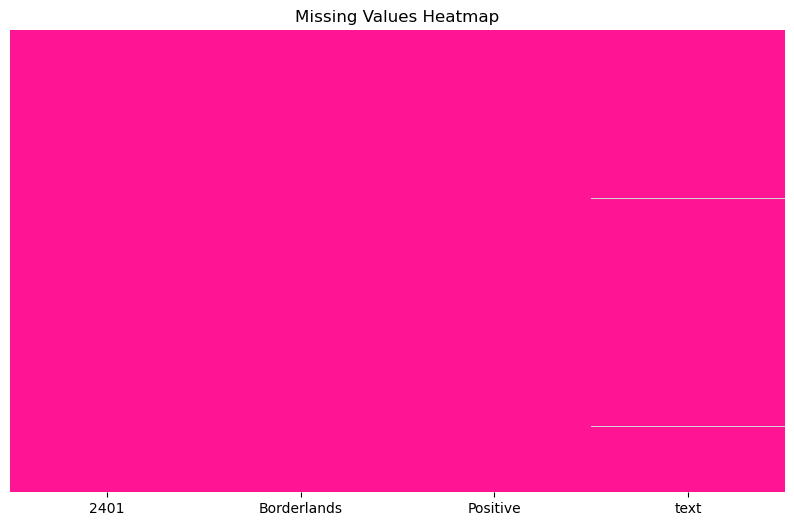

In [9]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
custom_cmap = sns.color_palette(["#FF1493", "#D3D3D3"])
sns.heatmap(dataframe1.isnull(), cmap=custom_cmap, cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
dataframe1['text'].isna().sum()

686

In [11]:
print(type(dataframe1))

<class 'pandas.core.frame.DataFrame'>


In [12]:
dataframe1.dropna(inplace=True)

In [13]:
dataframe1.shape

(73995, 4)

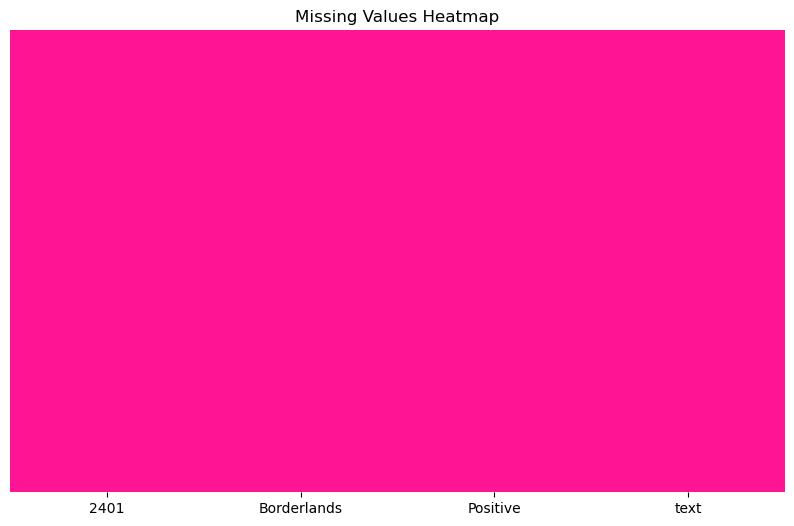

In [14]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
custom_cmap = sns.color_palette(["#FF1493", "#D3D3D3"])
sns.heatmap(dataframe1.isnull(), cmap=custom_cmap, cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [15]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 43495 to 17816
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   2401         73995 non-null  int64 
 1   Borderlands  73995 non-null  object
 2   Positive     73995 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [16]:
class_distribution_Borderlands = dataframe1['Borderlands'].value_counts()
print(class_distribution_Borderlands)

Borderlands
LeagueOfLegends                      2377
MaddenNFL                            2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
johnson&johnson                      2324
FIFA                                 2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands           

In [17]:
# Assuming binary classification
ratio_majority_minority_Borderlands = class_distribution_Borderlands[0] / class_distribution_Borderlands[1]
print(f"Ratio between majority and minority classes: {ratio_majority_minority_Borderlands}")

Ratio between majority and minority classes: 1.0


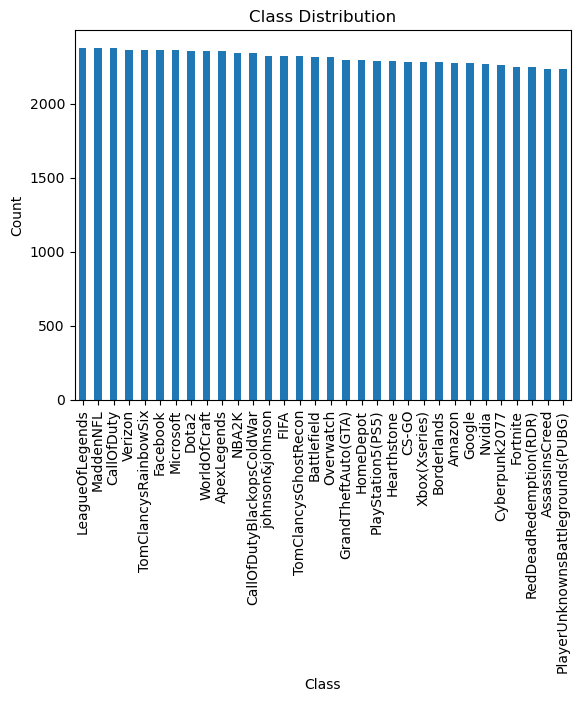

In [18]:
import matplotlib.pyplot as plt

# Plot class distribution
class_distribution_Borderlands.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [19]:
# from imblearn.over_sampling import RandomOverSampler
# # Example of oversampling the minority class
# oversampler = RandomOverSampler()
# X = dataframe1['text'] # Input Features (Independent Variables):  much to be 2D 
# Y = dataframe1['Borderlands']
# X_resampled, y_resampled = oversampler.fit_resample(X, Y)

In [20]:
class_distribution_Positive = dataframe1['Positive'].value_counts()
print(class_distribution_Positive)

Positive
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


In [21]:
# Assuming binary classification
ratio_majority_minority = class_distribution_Positive[0] / class_distribution_Positive[1]
print(f"Ratio between majority and minority classes: {ratio_majority_minority}")

Ratio between majority and minority classes: 1.0825021787547207


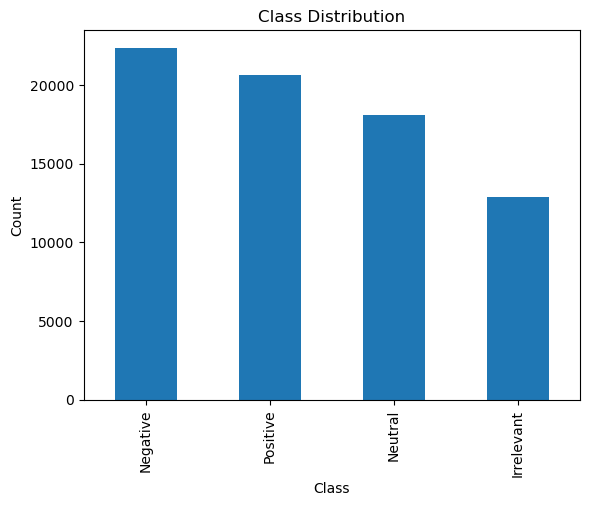

In [22]:
import matplotlib.pyplot as plt

# Plot class distribution
class_distribution_Positive.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [23]:
set(dataframe1['Borderlands']) # set() fetch the unique data only

{'Amazon',
 'ApexLegends',
 'AssassinsCreed',
 'Battlefield',
 'Borderlands',
 'CS-GO',
 'CallOfDuty',
 'CallOfDutyBlackopsColdWar',
 'Cyberpunk2077',
 'Dota2',
 'FIFA',
 'Facebook',
 'Fortnite',
 'Google',
 'GrandTheftAuto(GTA)',
 'Hearthstone',
 'HomeDepot',
 'LeagueOfLegends',
 'MaddenNFL',
 'Microsoft',
 'NBA2K',
 'Nvidia',
 'Overwatch',
 'PlayStation5(PS5)',
 'PlayerUnknownsBattlegrounds(PUBG)',
 'RedDeadRedemption(RDR)',
 'TomClancysGhostRecon',
 'TomClancysRainbowSix',
 'Verizon',
 'WorldOfCraft',
 'Xbox(Xseries)',
 'johnson&johnson'}

In [24]:
set(dataframe1[['Borderlands']].values.ravel()) # set() fetch the unique data only

{'Amazon',
 'ApexLegends',
 'AssassinsCreed',
 'Battlefield',
 'Borderlands',
 'CS-GO',
 'CallOfDuty',
 'CallOfDutyBlackopsColdWar',
 'Cyberpunk2077',
 'Dota2',
 'FIFA',
 'Facebook',
 'Fortnite',
 'Google',
 'GrandTheftAuto(GTA)',
 'Hearthstone',
 'HomeDepot',
 'LeagueOfLegends',
 'MaddenNFL',
 'Microsoft',
 'NBA2K',
 'Nvidia',
 'Overwatch',
 'PlayStation5(PS5)',
 'PlayerUnknownsBattlegrounds(PUBG)',
 'RedDeadRedemption(RDR)',
 'TomClancysGhostRecon',
 'TomClancysRainbowSix',
 'Verizon',
 'WorldOfCraft',
 'Xbox(Xseries)',
 'johnson&johnson'}

In [25]:
dataframe1.groupby('Borderlands').Borderlands.count()

Borderlands
Amazon                               2276
ApexLegends                          2353
AssassinsCreed                       2234
Battlefield                          2316
Borderlands                          2279
CS-GO                                2284
CallOfDuty                           2376
CallOfDutyBlackopsColdWar            2343
Cyberpunk2077                        2262
Dota2                                2359
FIFA                                 2324
Facebook                             2362
Fortnite                             2249
Google                               2274
GrandTheftAuto(GTA)                  2293
Hearthstone                          2286
HomeDepot                            2292
LeagueOfLegends                      2377
MaddenNFL                            2377
Microsoft                            2361
NBA2K                                2343
Nvidia                               2271
Overwatch                            2316
PlayStation5(PS5)     

In [26]:
set(dataframe1['Positive'].unique()) # set() fetch the unique data only

{'Irrelevant', 'Negative', 'Neutral', 'Positive'}

In [27]:
dataframe1.groupby('Positive').Positive.count()

Positive
Irrelevant    12875
Negative      22358
Neutral       18108
Positive      20654
Name: Positive, dtype: int64

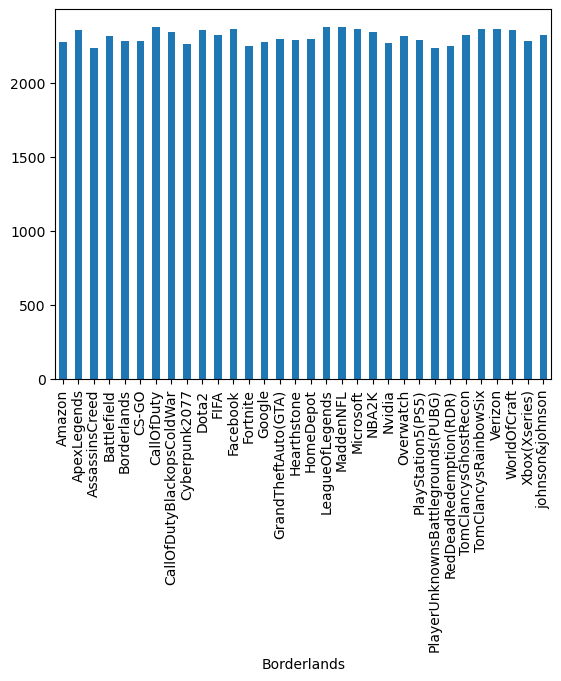

In [28]:
#Analyzing data
dataframe1.groupby('Borderlands').Borderlands.count().plot.bar()
plt.show()

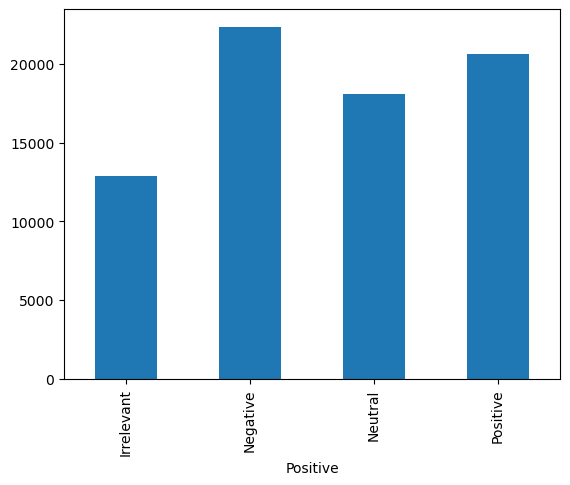

In [29]:
#Analyzing data
dataframe1.groupby('Positive').Positive.count().plot.bar()
plt.show()

In [30]:
# Group by 'Borderlands' and 'Positive' columns and count occurrences
grouped_data = dataframe1.groupby(['Borderlands', 'Positive']).size().unstack()
grouped_data

Positive,Irrelevant,Negative,Neutral,Positive
Borderlands,,,,
Amazon,186,575,1207,308
ApexLegends,192,591,936,634
AssassinsCreed,264,375,156,1439
Battlefield,915,464,351,586
Borderlands,240,426,597,1016
CS-GO,632,344,548,760
CallOfDuty,672,883,375,446
CallOfDutyBlackopsColdWar,569,566,352,856
Cyberpunk2077,465,385,462,950


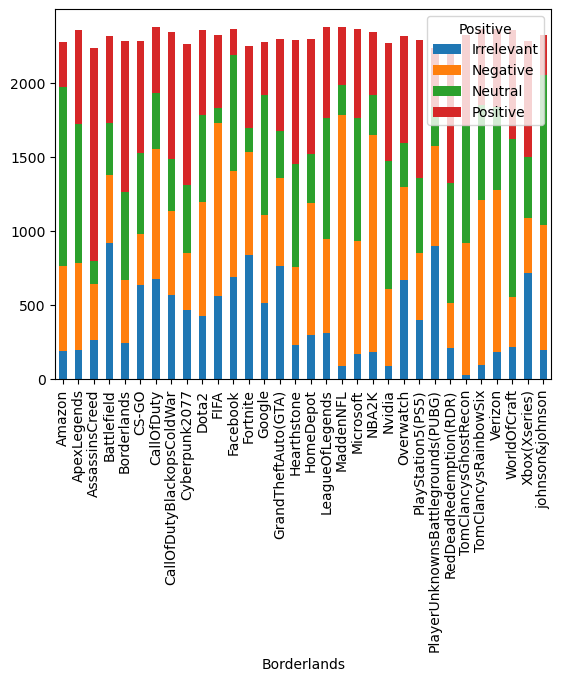

In [31]:
# Group by 'Borderlands' and 'Positive' columns and count occurrences
grouped_data = dataframe1.groupby(['Borderlands', 'Positive']).size().unstack()

# Plotting
grouped_data.plot(kind='bar', stacked=True)
plt.show()

# Data Preprocessing

In [32]:
#stop words
nltk.download('stopwords')
stop_word = stopwords.words("english")
print(stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Data Cleaning using stemmer and by removing stopwords

In [33]:
# dataframe1['Borderlands'] = list(map(lambda x: " ".join([i for i in stemmer.stem(re.sub("[^a-zA-Z]", " ", x.lower())).split() if i not in stop_word]), dataframe1['Borderlands']))
# dataframe1['Positive'] = list(map(lambda x: " ".join([i for i in stemmer.stem(re.sub("[^a-zA-Z]", " ", x.lower())).split() if i not in stop_word]), dataframe1['Positive']))
# dataframe1

In [34]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
# Create a stemmer
stemmer = PorterStemmer()
# dataframe1[['Borderlands', 'Positive']] = dataframe1[['Borderlands', 'Positive']].apply(lambda x: " ".join([i for i in stemmer.stem(re.sub("[^a-zA-Z]", " ", x.lower())).split() if i not in stop_word]), dataframe1['Borderlands','Positive']))

dataframe1[['Borderlands', 'Positive']] = dataframe1[['Borderlands', 'Positive']].apply(lambda x: x.apply(lambda y: " ".join([i for i in stemmer.stem(re.sub("[^a-zA-Z]", " ", str(y).lower())).split() if i not in stop_word])))
dataframe1

,2401,Borderlands,Positive,text
43495,10267,playerunknownsbattlegrounds pubg,irrelev,"When the Chinese first took over our land, Mod..."
15616,3072,dota,neg,Creeps are the most important thing on the ent...
6950,396,amazon,posit,Amazon<unk> still delivering so itâs a good ...
38577,5417,hearthston,posit,"And Hey pretty guys, I just hit legend on EU w..."
63782,7730,maddennfl,neg,@EAMaddenNFL & @Ronnie2K NBA2k20 & Madden 20 ...
...,...,...,...,...
44489,11642,verizon,neg,Hey @verizonfios @verizon @VerizonSupport Why ...
42112,10025,playerunknownsbattlegrounds pubg,neg,News: PUBG Mobile Business is here at start de...
58175,11575,tomclancysrainbowsix,neg,@Rainbow6Game Iâm having connection issues p...
36748,8304,microsoft,neg,a


In [35]:
column_names = dataframe1.columns
print(column_names)

Index(['2401', 'Borderlands', 'Positive', 'text'], dtype='object')


In [36]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 43495 to 17816
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   2401         73995 non-null  int64 
 1   Borderlands  73995 non-null  object
 2   Positive     73995 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [37]:
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.metrics import classification_report

# # Assuming 'text' is the feature column and 'Borderlands' and 'Positive' are the label columns
# X = dataframe1['text']
# Y = dataframe1[['Borderlands', 'Positive']]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# # Text vectorization and feature selection
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# # Define the neural network model with multiple outputs
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(X_train_tfidf.shape[1],)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid', name='Borderlands'),  # Output for 'Borderlands'
#     tf.keras.layers.Dense(1, activation='sigmoid', name='Positive')      # Output for 'Positive'
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss={'Borderlands': 'binary_crossentropy', 'Positive': 'binary_crossentropy'},
#               metrics={'Borderlands': 'accuracy', 'Positive': 'accuracy'})

# # Train the model
# model.fit(X_train_tfidf, {'Borderlands': y_train['Borderlands'], 'Positive': y_train['Positive']},
#           epochs=5, batch_size=32, validation_split=0.1)

# # Evaluate the model
# predictions = model.predict(X_test_tfidf)
# y_pred = {'Borderlands': (predictions[:, 0] > 0.5).astype(int),
#           'Positive': (predictions[:, 1] > 0.5).astype(int)}

# # Extracting columns for the classification report
# target_names = ['Borderlands', 'Positive']
# print("Classification Report for Borderlands:")
# print(classification_report(y_test['Borderlands'], y_pred['Borderlands'], target_names=target_names))

# print("Classification Report for Positive:")
# print(classification_report(y_test['Positive'], y_pred['Positive'], target_names=target_names))


In [38]:
# # Extracting features (X) and labels (Y)
# X = dataframe1[['text',]]
# Y = dataframe1[['Borderlands', 'Positive']]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# # Creating Pipeline with MultiOutputClassifier
# pipeline = Pipeline([
#     ('vect', TfidfVectorizer()),
#     ('chi', SelectKBest(chi2, k=2000)),
#     ('clf', MultiOutputClassifier(LogisticRegression(random_state=1)))
# ])

# # Training model
# model = pipeline.fit(X_train, y_train)


# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))

In [39]:
# import pandas as pd
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.feature_extraction.text import CountVectorizer

# # Assuming your DataFrame is named 'dataframe1'
# X = dataframe1['text']
# y = dataframe1['Positive'] 

# # Convert text data into numerical format using CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(X)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define a simple neural network model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Use class weights to handle imbalance
# class_weights = {0: 1, 1: 10}  # Adjust the weights based on your dataset

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=10, class_weight=class_weights)

# # Evaluate the model
# y_pred = model.predict_classes(X_test)
# print(classification_report(y_test, y_pred))


In [40]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Assuming your DataFrame is named 'dataframe1'
X = dataframe1['text']
y = dataframe1['Positive'] 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Creating Pipeline with Logistic Regression
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('chi', SelectKBest(chi2, k=2000)),
#     ('clf', LogisticRegression(random_state=1)) # accuracy 0.6322522522522522
    ('clf', BalancedRandomForestClassifier(n_estimators=100, random_state=42)) # accuracy 0.8702702702702703
])

# Training model
model = pipeline.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))


/home/kali/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/kali/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [41]:
pipeline.fit(X_train,y_train)

/home/kali/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/kali/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Pipeline(steps=[('vect', TfidfVectorizer()),
                ('chi',
                 SelectKBest(k=2000,
                             score_func=<function chi2 at 0x7f1a7cc2a520>)),
                ('clf', BalancedRandomForestClassifier(random_state=42))])

In [42]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62895,)
y_train shape: (62895,)
X_test shape: (11100,)
y_test shape: (11100,)


In [43]:
X_test

57984    Ok, so it turns out u can now destroy Yings Ca...
811      So last night.... The first game of Borderland...
14494                                           feels that
37158    I may not be the first to observe this, but Ma...
18473    Sony: doesn't announce the price . .  . . le P...
                               ...                        
13699    @ ItsShake4ndbake @ N2K _ MyTEAM @ Wit2k17 WHY...
68876    I guess a lot of people are also waiting for c...
41072    A release for Battlefield 4 member ItzAwwZy ha...
6989     Hey everything sucks so letâs play video gam...
61622             Neph be sooooo mad when he die on earth.
Name: text, Length: 11100, dtype: object

In [44]:
y_test

57984      posit
811        posit
14494      posit
37158    neutral
18473    neutral
          ...   
13699        neg
68876      posit
41072    irrelev
6989     neutral
61622    irrelev
Name: Positive, Length: 11100, dtype: object

In [45]:
predictions = model.predict(X_test)
predictions

array(['neg', 'posit', 'posit', ..., 'irrelev', 'neutral', 'irrelev'],
      dtype=object)

In [46]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_sentiment = model.predict(X_test)
print(accuracy_score(y_test,predict_sentiment))

0.8662162162162163


In [ ]:
sentiment = input("Enter sentiment = ")
sentiment_data = {'predict_news':[sentiment]}
sentiment_data_df = pd.DataFrame(sentiment_data)
# news_data_df
predict_sentiment_typ = model.predict(sentiment_data_df['predict_news'])
print("Predicted sentiment type = ",predict_sentiment_typ[0])

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,predictions)
print(cm)

[[1708   52  131   89]
 [ 113 2918  218  141]
 [ 104   99 2387  108]
 [  95  100  235 2602]]


In [56]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(confusion_matrix(model.predict(X_test),ytest))
print(classification_report(ytest,model.predict(X_test)))

[[1708  113  104   95]
 [  52 2918   99  100]
 [ 131  218 2387  235]
 [  89  141  108 2602]]
              precision    recall  f1-score   support

     irrelev       0.85      0.86      0.85      1980
         neg       0.92      0.86      0.89      3390
     neutral       0.80      0.88      0.84      2698
       posit       0.89      0.86      0.87      3032

    accuracy                           0.87     11100
   macro avg       0.86      0.87      0.86     11100
weighted avg       0.87      0.87      0.87     11100



In [57]:
# confusion matrix and classification report(precision, recall, F1-score)
# ytest = np.array(label_test)
print(classification_report(pipeline.predict(X_test),y_test))

              precision    recall  f1-score   support

     irrelev       0.86      0.85      0.85      2020
         neg       0.86      0.92      0.89      3169
     neutral       0.88      0.80      0.84      2971
       posit       0.86      0.89      0.87      2940

    accuracy                           0.87     11100
   macro avg       0.87      0.86      0.86     11100
weighted avg       0.87      0.87      0.87     11100



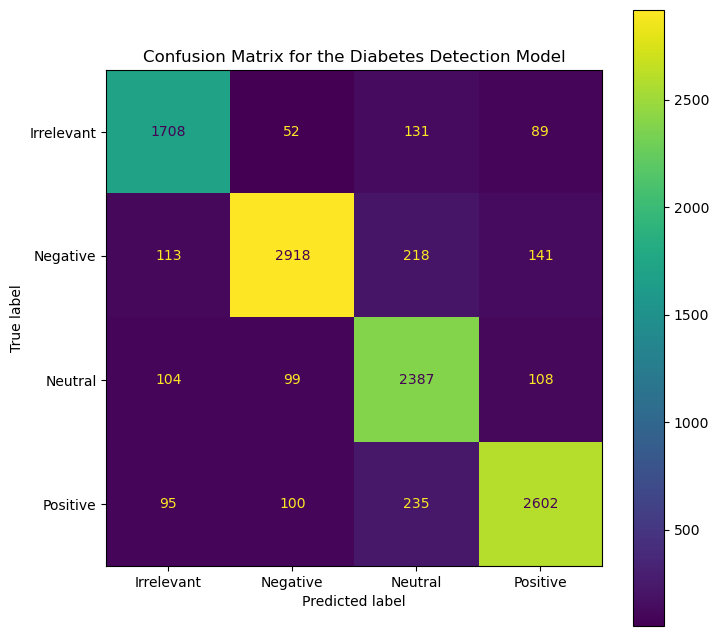

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
class_names =['Irrelevant', 'Negative', 'Neutral', 'Positive']
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);